## Fuzzy

In [12]:
import numpy as np
dataset = list([
    #          g1              g2                g3                  g4
    [  (  0,   0, 1/4),  (  0, 1/4, 1/2),  (1/4, 1/2, 3/4),  (  0,   0, 1/4)  ],   #g1
    [  (1/2, 3/4,   1),  (  0,   0, 1/4),  (3/4,   1,   1),  (3/4,   1,   1)  ],   #g2
    [  (1/2, 3/4,   1),  (1/4, 1/2, 3/4),  (  0,   0, 1/4),  (  0, 1/4, 1/2)  ],   #g3
    [  (3/4,   1,   1),  (  0, 1/4, 1/2),  (1/4, 1/2, 3/4),  (  0,   0, 1/4)  ]    #g4
    ])

In [13]:
X_a = np.zeros((len(dataset), len(dataset)))
X_b = np.zeros((len(dataset), len(dataset)))
X_c = np.zeros((len(dataset), len(dataset)))

m_a = np.ones((len(dataset), len(dataset))) # min
m_c = np.zeros((len(dataset), len(dataset))) # max

In [14]:
for i in range(0, len(dataset)):
   for j in range(0, len(dataset)):
     a, b, c  = dataset[i][j] # 每個位置都有三個數值
     X_a[i,j] = a
     X_b[i,j] = b
     X_c[i,j] = c
     if (a < m_a[i,j]): # 若a比1小 就用 a
        m_a[i,j] = a
     if (c > m_c[i,j]): # 若c比0 大 就用 c
        m_c[i,j] = c

m_a = np.min(m_a, axis = 1)
m_c = np.max(m_c, axis = 1)
X_a = (X_a - m_a) / (m_c - m_a)
X_b = (X_b - m_a) / (m_c - m_a)
X_c = (X_c - m_a) / (m_c - m_a)

L  = X_b / (1 + X_b - X_a)
R  = X_c / (1 + X_c - X_b)
W  = (L * (1 - L) + R * R) / (1 - L + R)
Z  = m_a  + W * (m_c - m_a)
print(Z) # 雖然是fuzzy但是還是會回到標準的4*4 matrix

[[0.0375     0.26666667 0.5        0.03333333]
 [0.7125     0.03333333 0.96666667 0.96666667]
 [0.7125     0.5        0.03333333 0.26666667]
 [1.         0.26666667 0.5        0.03333333]]


1. 定義因素及評量尺度**

To **比較變數之間的關係**, 建立一個 n * n 的table to the experts, 其中n是對應的因子, 填答者需根據左邊第1列對應於右邊第1欄的影響程度，填入表格中空白格，分別以五個尺度進行區分，從無影響到極高影響分別為 0、1、 2、 3、 4 五個等級，並寫上數字，分別代表 **{無相關、低度相關、中度相關、高度相關、極高度相關} - five Likert Scale**。

- if there are 7 experts, then we get the mean of the element in n * n table.

2. 建立直接關係矩陣

- 上面的 <mark>Z</mark> 就是 **直接關係矩陣**,
- 正規化關係矩陣後，接下來便要建立直接/間接關係矩陣


3. 正規化 直接關係矩陣

$$
\lambda = \frac{1}{\text{max}_[1<i<n] [\sum z_{ij}]}
$$

- 正規化 <mark>直接關係矩陣 $N$</mark> ，可由 直接關係矩陣 $Z$ 乘以 $\lambda$ 值


4. 得出 正規化關係矩陣 $N$ 後，接下來便要建立 直接/間接關係矩陣 $T$

- 建立直接/間接關係矩陣
$$
T=N(I-I-N)^{-1}
$$

- 由直接/間接關係矩陣 $T$ 求出 $D_i$ 與 $R_j$ 值
$$
D_i = \sum_i t_{ij}; R_j = \sum_j t_{ij}
$$

In [15]:
X = Z/np.max(np.sum(Z, axis = 1))
Y = np.linalg.inv(np.identity(X.shape[0]) - X)
T = np.matmul(X, Y)

D = np.sum(T, axis = 1)
R = np.sum(T, axis = 0)

DEMETAL 就是要有四個變數 <mark>D_plus_R, D_minus_R, T, weights</mark>

- $(D_k+R_k)$ 為中心度,顯現該因素k在所有問題中的核心程度；

- $(D_k–R_k)$ 為原因度，此值可顯現該因素k在所有問題中歸屬的因果程度，
 - 若為正值則該因素偏向為原因類，若為負值表該因素偏向為結果類

In [16]:
D_plus_R = D + R # 中心度
D_minus_R = D - R
weights = (D_plus_R - D_minus_R)/(np.sum(D_plus_R + D_minus_R))
T

array([[0.19666981, 0.1927033 , 0.31877271, 0.11760941],
       [0.74330491, 0.2769602 , 0.71047733, 0.54751457],
       [0.52587101, 0.31960815, 0.27637506, 0.25203789],
       [0.62657762, 0.26193263, 0.43329292, 0.15986101]])

In [17]:
# Prominence = D + R
for i in range(0, D_plus_R.shape[0]):
    print('g'+str(i+1), round(D_plus_R[i], 3) )

g1 2.918
g2 3.329
g3 3.113
g4 2.559


In [18]:
for i in range(0, D_minus_R.shape[0]):
    print('g'+str(i+1), round(D_minus_R[i], 3) )

g1 -1.267
g2 1.227
g3 -0.365
g4 0.405


In [19]:
# Criteira Weights
for i in range(0, weights.shape[0]):
    print('g'+str(i+1), round(weights[i], 3) )

g1 0.351
g2 0.176
g3 0.292
g4 0.181


In [20]:
causal_factors = ''
result_factors = ''
for i in range(len(R)):
    if R[i] > 0:
      causal_factors = causal_factors + 'x' + str(i + 1) + ' '
    elif R[i] < 0:
      result_factors = result_factors + 'x' + str(i + 1) + ' '
print("原因要素:" + causal_factors)
print("结果要素:" + result_factors)

原因要素:x1 x2 x3 x4 
结果要素:


**繪製因果關係圖**

因果關係圖可將各因素間複雜的關係進行簡化，展現出各因素對其他因素的影響情況，繪製因果圖時，以中心度(Dk+Rk)為橫軸，原因度(Dk–Rk )為縱軸，構成一個座標圖形。

运用上文计算的结果，绘制原因-结果图，这张图可以看到各个因子之间互相影响的大小，以及对研究内容影响的大小.

- 第1类为强原因因子集（第Ⅰ区），这类因子对研究对象的形成具有非常显著的影响，且对其他结果型因子有较大的影响；

- 第2类为弱原因因子集（第Ⅱ区），这类因子对研究对象的形成也具有重要影响，对其他结果型因子也有一定的影响；

- 第3类为弱结果因子集（第Ⅲ区），这类因子是其他原因型因子综合作用的结果，对研究对象的形成具有一定的影响；

- 第4类为强结果因子集（第Ⅳ区），这类因子也是其他原因型因子综合作用的结果，但是对研究对象的形成具有非常重要的影响。



DEMATEL计算所得因子中心度越大，其影响程度也就越大，因此，需要重点关注**第Ⅰ区的强原因因子集及第Ⅳ区的强结果因子集**。

In [21]:
E = T + np.identity(Z.shape[0]) # 整體影響矩陣

In [ ]:
matrix = list([0, 1, 0],
                  [2, 0, 3],
                  [0, 4, 0])
#new_matrix = np.where(matrix != 0, 1, matrix)

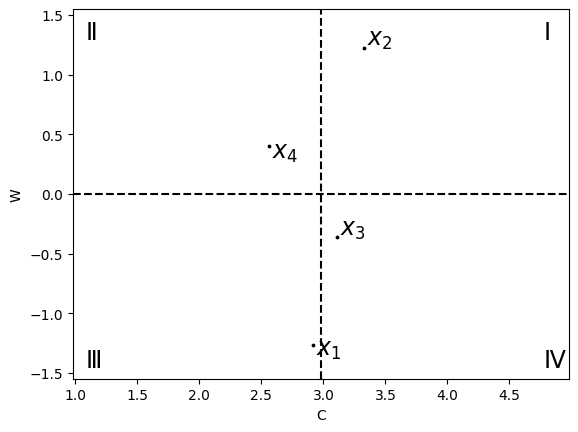

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#x轴为上文计算出的中心度
x = D_plus_R # 中心度
y = D_minus_R

#因子名
factors_name = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_5$',
        r'$x_6$', r'$x_7$', r'$x_8$', r'$x_9$', r'$x_{10}$'] # 10 factors

#画散点图，并增加相应名称、线段和调整大小和位置
plt.scatter(x, y, s=3, c='k')

plt.xlabel('C')
plt.ylabel('W')
for i in range(len(x)):
    if i == 0:
        plt.text(x[i]+0.025, y[i]-0.085, factors_name[i], fontsize=17)
    elif i == 3:
        plt.text(x[i]+0.025, y[i]-0.1, factors_name[i], fontsize=17)
    elif i == 6:
        plt.text(x[i]-0.18, y[i]-0.1, factors_name[i], fontsize=17)
    elif i == 7:
        plt.text(x[i]-0.15, y[i]-0.12, factors_name[i], fontsize=17)
    else:
        plt.text(x[i]+0.025, y[i]+0.025, factors_name[i], fontsize=17)

plt.vlines(sum(x)/len(x), -1.55, 1.55, colors='k', linestyles='dashed')
plt.hlines(0, sum(x)/len(x)-2, sum(x)/len(x)+2, colors='k', linestyles='dashed')

plt.xlim(sum(x)/len(x)-2, sum(x)/len(x)+2)
plt.ylim(-1.55, 1.55)

plt.text(sum(x)/len(x)+2-0.2, 1.4-0.1, 'Ⅰ', fontsize=17)
plt.text(sum(x)/len(x)-2+0.1, 1.4-0.1, 'Ⅱ', fontsize=17)
plt.text(sum(x)/len(x)-2+0.1, -1.55+0.1, 'Ⅲ', fontsize=17)
plt.text(sum(x)/len(x)+2-0.2, -1.55+0.1, 'Ⅳ', fontsize=17)

plt.show()

## ISM analysis Go

ISM(解釋結構模型，Interpretative Structural Modeling Method,簡稱ISM方法)是一種系統工程研究方法，其作用在於研究系統結構關係情況；已知各要素間的影響關係情況，現希望使用解釋結構模型將各種邏輯結構關係進行梳理，比如找出各要素的層級層次關係情況，此時則可以使用解釋結構模型。

In [14]:
E = T + np.identity(Z.shape[0]) # 整體影響矩陣
lbd = 0.20      # 相应的lambda值
F = E
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        if E[i, j] > lbd:
            F[i,j] = 1
        elif E[i, j] < lbd:
            F[i, j] = 0

node_degree = np.sum(F, axis = 0) + np.sum(F, axis = 1)
print(sorted(node_degree, reverse=True))
F

[np.float64(8.0), np.float64(7.0), np.float64(7.0), np.float64(6.0)]


array([[1., 0., 1., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

ISM analysis is based on the <mark>reachability matrix (RM)</mark>

<mark>F is the inp.txt</mark>

In [33]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

#Class to represent a graph
class Graph:
    def __init__(self, vertices):
        self.V = vertices

    # A utility function to print the solution
    def printSolution(self, reach):
        print ("Following matrix transitive closure of the given graph ")
        for i in range(self.V):
            for j in range(self.V):
                print (reach[i][j],end=" ")
            print("\n")


    # Prints transitive closure of graph[][]
    def transitiveClosure(self,graph):
        reach =[i[:] for i in graph]
        for k in range(self.V):
            for i in range(self.V):
                for j in range(self.V):
                    reach[i][j] = reach[i][j] or (reach[i][k] and reach[k][j])
        return reach

def print_final_reachability(initial, final):
	mat = np.matrix(final)
	with open('outfile.txt','wb') as f:
		for line in mat:
			np.savetxt(f, line, fmt='%.f')

	for i in range(n):
            for j in range(n):
                if(final[i][j]==1 and initial[i][j]==0):
                    print('1*',end=" ")
                elif(final[i][j]==1):
                    print('1',end=" ")
                else:
                    print('0',end=" ")
            print("\n")

def Level_Partioning(final):
    common_mat = []
    for i in range(n):
        temp_reach = []
        temp_antec = []
        for j in range(n):
            if(final[i][j]==1):
                temp_reach.append(j)
            if(final[j][i]==1):
                temp_antec.append(j)
        common_mat.append(temp_reach)
        common_mat.append(temp_antec)
    return common_mat

def stop_crit(level):
    for x in level:
        if(x==0):
            return True
    return False

def xandy(final):
    Driving_power = []
    Dependence_power = []

    for i in range(n):
        countx=0
        county=0
        for j in range(n):
            if(final[i][j]==1):
                countx = countx + 1
            if(final[j][i]==1):
                county = county + 1
        Driving_power.append(countx)
        Dependence_power.append(county)
    return Driving_power, Dependence_power

def find_level(intersection_set, common_mat):
    levels = np.zeros(n, dtype=int)
    count = 1

    while(stop_crit(levels)):
        store = []
        for i in range(n):
            if(len(intersection_set[i])!=0 and set(intersection_set[i]) == set(common_mat[2*i])):
                levels[i] = count
                store.append(i)
        count = count + 1
        for x in store:
            for i in common_mat:
                if x in i: i.remove(x)
            for i in intersection_set:
                if x in i: i.remove(x)
    return levels

def plot_it(Driving_power, Dependence_power):
    plt.scatter(Dependence_power, Driving_power)
    pts = dict() #pts is dictionary mapping from tuple of points to list of index corresponding to that
    for i, txt in enumerate(range(n)):
    	t = (Dependence_power[i], Driving_power[i]) #t is placeholder variable for coordinate
    	if t in pts:
    		pts[t].append(txt+1)
    	else:
    		pts[t]=[txt+1]

    for i, txt in enumerate(range(n)):
       	t = (Dependence_power[i], Driving_power[i])
        plt.annotate(pts[t],t)


    x1, y1 = [-1, n+1], [n/2, n/2]
    x2, y2 = [n/2, n/2], [-1, n+1]
    plt.plot(x1, y1, x2, y2)

    plt.xlim(0,n+1)
    plt.ylim(0,n+1)
    plt.xlabel('Dependence')
    plt.ylabel('Driving Power')
    plt.title('Micmac Analysis')
    plt.grid()
    plt.show()

In [34]:
n = 13
graph = np.loadtxt('inp.txt', usecols=range(n))

g= Graph(n)
final = g.transitiveClosure(graph)

temp = np.loadtxt('inp.txt', usecols=range(n))
print_final_reachability(temp, final)
Driving_power, Dependence_power = xandy(final)

common_mat = Level_Partioning(final)

1 1 1 1 1 1* 1 1* 1 1* 1 1* 1* 

0 1 0 0 0 1 1 0 0 0 0 1* 1 

0 1* 1 1 1* 1* 1 1 0 0 1* 1* 1* 

0 1* 0 1 1 1* 1 0 0 0 1* 1* 1* 

0 1 0 1 1 1 1 0 0 0 1 1 1* 

0 1 0 0 0 1 1 0 0 0 0 1* 1 

0 0 0 0 0 0 1 0 0 0 0 1 0 

0 1 1 1* 1 1 1 1 0 0 1 1* 1* 

1 1* 1* 1* 1* 1 1 1 1 1 1* 1* 1* 

1* 1* 1 1* 1 1* 1* 1 1 1 1* 1 1* 

0 1* 0 1* 1 1 1 0 0 0 1 1 1* 

0 0 0 0 0 0 1 0 0 0 0 1 0 

0 1 0 0 0 1 1* 0 0 0 0 1* 1 



In [35]:
intersection_set = []
for i in range(n):
    intersection_set.append(list(set(common_mat[2*i]) & set(common_mat[2*i + 1])))

levels = find_level(intersection_set, common_mat)
levels

array([5, 2, 4, 3, 3, 2, 1, 4, 5, 5, 3, 1, 2])

Level in ISM for E1 is 5
Level in ISM for E2 is 2
Level in ISM for E3 is 4
Level in ISM for E4 is 3
Level in ISM for E5 is 3
Level in ISM for E6 is 2
Level in ISM for E7 is 1
Level in ISM for E8 is 4
Level in ISM for E9 is 5
Level in ISM for E10 is 5
Level in ISM for E11 is 3
Level in ISM for E12 is 1
Level in ISM for E13 is 2


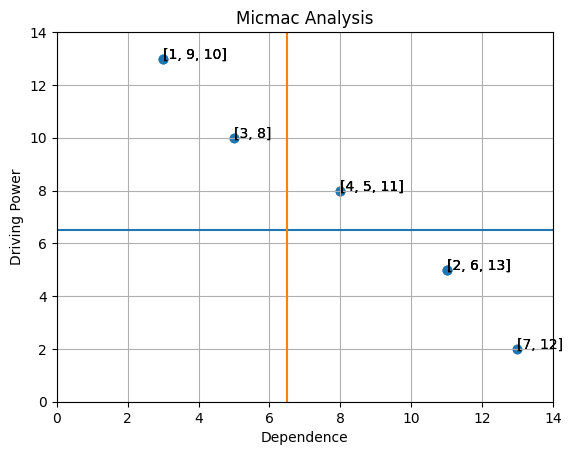

In [36]:
for i in range(n):
    print('Level in ISM for E%d is %d'%(i+1,levels[i]))

plot_it(Driving_power, Dependence_power)

In [37]:
import numpy as np
matrix = np.array([[0, 1, 0], [2, 0, 3], [0, 4, 0]])

new_matrix = np.where(matrix != 0, 1, matrix)
print(new_matrix)

[[0 1 0]
 [1 0 1]
 [0 1 0]]


In [38]:
import numpy as np
n = 13
graph = np.loadtxt('inp.txt', usecols=range(n))
print(graph)

[[1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]]


In [39]:
def ism(adj_matrix, alpha=0.85, max_iter=100, tol=1e-6):
    n = adj_matrix.shape[0]
    v = np.ones((n,1))/n

    for i in range(max_iter):
        last_v = v
        v = alpha * np.matmul(adj_matrix, v) + (1-alpha)* np.ones((n,1))/n
        if np.linalg.norm(v-last_v) < tol:
            break
    return v

final = ism(graph)
final.shape

(13, 1)

In [40]:
def transitiveClosure(graph, n):
        reach =[i[:] for i in graph]
        for k in range(n):
            for i in range(n):
                for j in range(n):
                    reach[i][j] = reach[i][j] or (reach[i][k] and reach[k][j])
        return reach

final = transitiveClosure(graph, n)
len(final)

13

### New start I
Build reachability matrix from influence matrix

In [41]:
import numpy as np

# Define the factors and the initial influence matrix
factors = [
    "Energy Efficiency", "Water Management", "Waste Reduction",
    "Renewable Energy Adoption", "Emission Control"
]

# Hypothetical influence matrix
matrix = np.array([
    [0, 0.6, 0.3, 0.5, 0.2],  # Energy Efficiency
    [0.4, 0, 0.7, 0.3, 0.6],  # Water Management
    [0.5, 0.4, 0, 0.6, 0.3],  # Waste Reduction
    [0.3, 0.5, 0.4, 0, 0.7],  # Renewable Energy Adoption
    [0.6, 0.3, 0.5, 0.4, 0]   # Emission Control
])

# Step 1: Normalize the matrix
normalized_matrix = matrix / np.max(matrix)

# Step 2: Initialize the reachability matrix
reachability_matrix = normalized_matrix.copy()

# Step 3: Compute the reachability matrix through iteration
max_iterations = 100  # Allow for more iterations for convergence
tolerance = 1e-6  # Convergence tolerance
for _ in range(max_iterations):
    # Perform matrix multiplication to get indirect reachability
    reachability_matrix_new = np.dot(reachability_matrix, normalized_matrix)

    # Add the new reachability to the existing one (union of direct and indirect influences)
    reachability_matrix_new = np.maximum(reachability_matrix, reachability_matrix_new)

    # Check if the matrix has converged (i.e., no significant changes between iterations)
    if np.allclose(reachability_matrix, reachability_matrix_new, atol=tolerance):
        print(f"Converged after {_+1} iterations.")
        break

    # Update reachability matrix for the next iteration
    reachability_matrix = reachability_matrix_new

# Step 4a: Normalize the reachability matrix to keep values within the range [0, 1]
reachability_matrix_normalized = reachability_matrix / np.max(reachability_matrix)

# Step 5a: Display the final reachability matrix
print("Final Reachability Matrix:")
print(reachability_matrix_normalized)

# Step 4b: Create the binary reachability matrix (thresholding)
binary_reachability_matrix = (reachability_matrix_normalized > 0).astype(int)

# Step 5b: Display the final reachability matrix
print("Final Reachability Matrix:")
print(binary_reachability_matrix)

Final Reachability Matrix:
[[0.81216519 0.81112107 0.84723881 0.81412014 0.8095032 ]
 [0.95860244 0.95737006 1.         0.96090988 0.95546048]
 [0.88321781 0.88208235 0.92135987 0.88534379 0.88032294]
 [0.92951545 0.92832047 0.96965688 0.93175288 0.92646883]
 [0.87219028 0.87106899 0.90985611 0.87428972 0.86933155]]
Final Reachability Matrix:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [42]:
import numpy as np

# Define the factors and the initial influence matrix
factors = [
    "Energy Efficiency", "Water Management", "Waste Reduction",
    "Renewable Energy Adoption", "Emission Control"
]

# Hypothetical influence matrix
matrix = np.array([
    [0, 0.6, 0.3, 0.5, 0.2],  # Energy Efficiency
    [0.4, 0, 0.7, 0.3, 0 ],  # Water Management
    [0 , 0.4, 0, 0.6, 0.3],  # Waste Reduction
    [0.3, 0.5, 0,  0, 0.7],  # Renewable Energy Adoption
    [0.6, 0.3, 0.5, 0.4, 0]   # Emission Control
])

# Step 1: Normalize the matrix
normalized_matrix = matrix / np.max(matrix)

# Step 2: Initialize the reachability matrix
reachability_matrix = normalized_matrix.copy()

# Step 3: Compute the reachability matrix through iteration
max_iterations = 100  # Allow for more iterations for convergence
tolerance = 1e-6  # Convergence tolerance
for _ in range(max_iterations):
    # Perform matrix multiplication to get indirect reachability
    reachability_matrix_new = np.dot(reachability_matrix, normalized_matrix)

    # Add the new reachability to the existing one (union of direct and indirect influences)
    reachability_matrix_new = np.maximum(reachability_matrix, reachability_matrix_new)

    # Check if the matrix has converged (i.e., no significant changes between iterations)
    if np.allclose(reachability_matrix, reachability_matrix_new, atol=tolerance):
        print(f"Converged after {_+1} iterations.")
        break

    # Update reachability matrix for the next iteration
    reachability_matrix = reachability_matrix_new

# Step 4: Normalize the reachability matrix to keep values within the range [0, 1]
reachability_matrix_normalized = reachability_matrix / np.max(reachability_matrix)

# Step 5: Create the binary reachability matrix (thresholding)
binary_reachability_matrix = (reachability_matrix_normalized > 0).astype(int)

# Step 6: Display the final reachability matrix
print("Final Reachability Matrix:")
print(binary_reachability_matrix)

Final Reachability Matrix:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define factors and reachability matrix (transitive closure)
factors = ['A', 'B', 'C', 'D', 'E']
reachability_closure = np.array([
    [1, 1, 1, 1, 1],  # A influences B, C, D, E
    [1, 1, 1, 1, 1],  # B influences C, D, E
    [0, 1, 1, 1, 1],  # C influences D, E
    [0, 0, 1, 1, 1],  # D influences E
    [0, 0, 0, 0, 1]   # E influences only itself
])

# Step 2: Function to find reachability and antecedence sets for each factor
def get_sets(matrix, index):
    reachability_set = set(np.where(matrix[index, :] == 1)[0])  # Columns where reachability is 1
    antecedence_set = set(np.where(matrix[:, index] == 1)[0])  # Rows where antecedence is 1
    return reachability_set, antecedence_set

# Step 3: Partition factors into levels based on the intersection of reachability and antecedence sets
def partition_hierarchy(matrix):
    n = len(matrix)
    factors_levels = []
    remaining_factors = set(range(n))

    while remaining_factors:
        level = []
        for i in remaining_factors:
            # Get reachability and antecedence sets
            reach_set, ante_set = get_sets(matrix, i)
            # Intersection of reachability and antecedence sets gives the factor's level
            if not reach_set.difference(ante_set):  # if reach_set is a subset of ante_set
                level.append(i)

        # Remove the classified factors from the remaining set
        remaining_factors -= set(level)
        factors_levels.append(level)

    return factors_levels

# Step 4: Get the hierarchical levels of factors
levels = partition_hierarchy(reachability_closure)

# Step 5: Display results
print("Hierarchical Levels of Factors (Partitioning Method):")
for level, factors_in_level in enumerate(levels, start=1):
    print(f"Level {level}: {[factors[i] for i in factors_in_level]}")

# Step 6: Visualize the hierarchy using a simple plot
import networkx as nx

# Create a directed graph to visualize the hierarchy
G = nx.DiGraph()

# Add nodes and edges based on the reachability matrix
for i in range(len(reachability_closure)):
    for j in range(len(reachability_closure)):
        if reachability_closure[i, j] == 1:
            G.add_edge(factors[i], factors[j])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold")
plt.title("ISM Hierarchy Graph")
plt.show()

KeyboardInterrupt: 

In [ ]:
pip install networkx

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Define factors and reachability matrix
factors = ['A', 'B', 'C', 'D', 'E']
# The influence matrix where 1 indicates influence and 0 indicates no influence.
reachability_matrix = np.array([
    [1, 1, 0, 0, 0],  # A influences B
    [1, 1, 1, 0, 0],  # B influences C (,A)
    [0, 1, 1, 1, 0],  # C influences D (, B)
    [0, 0, 1, 1, 1],  # D influences E
    [0, 0, 0, 0, 1]   # E is independent in this case
])

# Step 2: Calculate transitive closure (Iterative approach)
def calculate_transitive_closure(matrix):
    n = matrix.shape[0]
    reachability = matrix.copy()  # Start with the original reachability matrix

    # Warshall's algorithm (iterative process to find the transitive closure)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # If i can reach k and k can reach j, then i can reach j
                reachability[i, j] = reachability[i, j] or (reachability[i, k] and reachability[k, j])

    return reachability

# Calculate the transitive closure of the reachability matrix
reachability_closure = calculate_transitive_closure(reachability_matrix)

# Step 3: Classify factors into levels (using reachability closure)
def classify_levels(reachability_closure):
    levels = {}
    for i in range(len(reachability_closure)):
        reachable = reachability_closure[i, :]
        levels[i] = np.sum(reachable)  # Sum of reachable factors
    return sorted(levels.items(), key=lambda x: x[1], reverse=True)

# Classify factors based on their reachability
levels = classify_levels(reachability_closure)


# Step 4: Display the results
print("Influence Matrix:")
print(reachability_matrix)
print("\nReachability Matrix (Transitive Closure):")
print(reachability_closure)
print("\nFactor Levels (from most influential to least influential):")

for factor, level in levels:
    print(f"{factors[factor]}: Level {level}")

# Step 5: Visualize the hierarchical structure using a graph
G = nx.DiGraph()

# Add edges based on the reachability matrix
for i in range(len(reachability_matrix)):
    for j in range(len(reachability_matrix)):
        if reachability_matrix[i, j] == 1:
            G.add_edge(factors[i], factors[j])

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.multipartite_layout(G, subset_key=lambda n: G.nodes[n]['level'] if 'level' in G.nodes[n] else 0)  # Layout for visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("ISM Graph Representation")
plt.show()

Influence Matrix:
[[1 1 0 0 0]
 [1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 0 0 1]]

Reachability Matrix (Transitive Closure):
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 0 0 1]]

Factor Levels (from most influential to least influential):
A: Level 5
B: Level 5
C: Level 5
D: Level 5
E: Level 1


NetworkXError: all nodes need a subset_key attribute: <function <lambda> at 0x0000022A3B7D5580>

<Figure size 800x600 with 0 Axes>

ML to build the reachability matrix

In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define the factors
factors = ['A', 'B', 'C', 'D', 'E']

# Example input data X (features for each factor)
# Rows are factors; columns represent some numerical features of each factor
X = np.array([
    [0.2, 0.1, 0.4, 0.5, 0.7, 0.3],  # Features for Factor A
    [0.3, 0.2, 0.4, 0.6, 0.2, 0.1],  # Features for Factor B
    [0.1, 0.3, 0.5, 0.4, 0.5, 0.9],  # Features for Factor C
    [0.4, 0.2, 0.3, 0.7, 0.2, 0.3],  # Features for Factor D
    [0.5, 0.3, 0.2, 0.6, 0.1, 0.4]   # Features for Factor E
])

# Target influence matrix (5x5), where y[i, j] = 1 means Factor i influences Factor j
y = np.array([
    [1, 1, 1, 0, 0],  # A influences A, B, C but not D, E
    [1, 1, 0, 1, 0],  # B influences A, B, D
    [0, 1, 1, 1, 0],  # C influences B, C, D
    [0, 0, 1, 1, 1],  # D influences C, D, E
    [1, 0, 1, 0, 1]   # E influences A, C, E
])

# Train a neural network (MLP classifier) to predict influence between factors
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
clf.fit(X, y)

# Predict the reachability matrix (5x5)
predicted_matrix = clf.predict(X)
print("Predicted Reachability Matrix (using Neural Network):")
print(predicted_matrix)

def calculate_levels(reachability_matrix):
    levels = []
    remaining_factors = set(range(len(reachability_matrix)))  # All factors initially

    while remaining_factors:
        level = set()

        for factor in remaining_factors:
            # If the factor influences no other factors or is not influenced by others, it's in the current level
            influenced_factors = set(np.where(reachability_matrix[factor] == 1)[0])
            if influenced_factors.issubset(remaining_factors):
                level.add(factor)

        levels.append(level)
        remaining_factors -= level

    return levels

# Calculate levels based on the reachability matrix
levels = calculate_levels(predicted_matrix)
print("\nFactor Levels (from ISM):")
for i, level in enumerate(levels):
    print(f"Level {i+1}: {[factors[i] for i in level]}")

# Plot the hierarchical structure using matplotlib
import networkx as nx

# Create a directed graph to visualize the hierarchy
G = nx.DiGraph()

# Add nodes (factors)
G.add_nodes_from(factors)

# Add edges based on the predicted reachability matrix
for i in range(len(factors)):
    for j in range(len(factors)):
        if predicted_matrix[i][j] == 1:
            G.add_edge(factors[i], factors[j])

# Plot the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)
plt.title("Hierarchical Structure Using Neural Networks in ISM")
plt.show()

In [32]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

stakeholder_1_ssim = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])

stakeholder_2_ssim = np.array([
    [0, 1, 1],
    [0, 0, 0],
    [1, 1, 0]
])

# Consolidate into a list for AdISM
stakeholder_inputs = [stakeholder_1_ssim, stakeholder_2_ssim]


In [33]:
# Step 2: Function to compute agreement and conflict matrices
def compute_agreement_conflict(stakeholder_inputs):
    n_stakeholders = len(stakeholder_inputs)
    combined_matrix = sum(stakeholder_inputs)  # Sum across matrices
    agreement_matrix = (combined_matrix == n_stakeholders).astype(int)
    conflict_matrix = ((combined_matrix > 0) & (combined_matrix < n_stakeholders)).astype(int)
    return agreement_matrix, conflict_matrix

# Step 3: Generate reachability matrix
def reachability_matrix(ssim):
    """Convert SSIM into a binary reachability matrix."""
    n = len(ssim)
    reachability = np.linalg.matrix_power(ssim, n) > 0
    return reachability.astype(int)

# Step 4: Compute agreement and conflict for AdISM
agreement_matrix, conflict_matrix = compute_agreement_conflict(stakeholder_inputs)

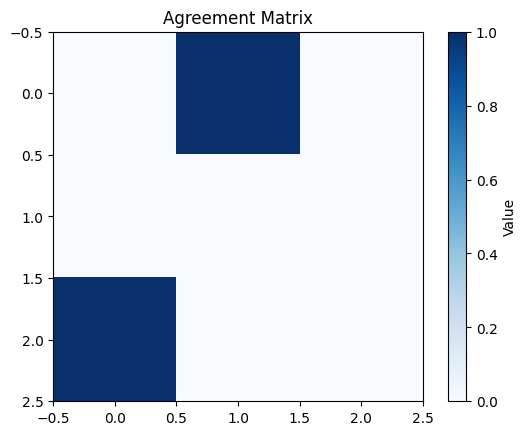

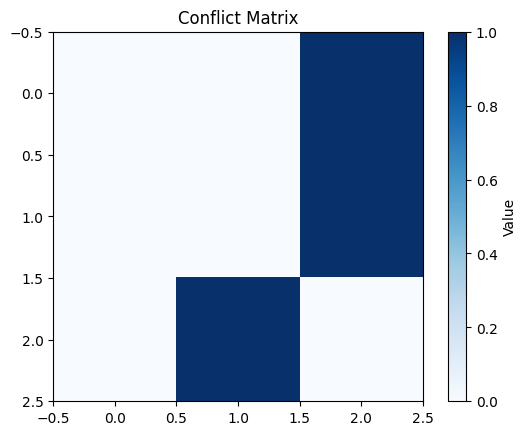

In [34]:
# Step 5: Visualize agreement and conflict
def visualize_matrix(matrix, title="Matrix"):
    plt.imshow(matrix, cmap="Blues", interpolation="none")
    plt.colorbar(label="Value")
    plt.title(title)
    plt.show()

visualize_matrix(agreement_matrix, title="Agreement Matrix")
visualize_matrix(conflict_matrix, title="Conflict Matrix")

In [35]:
# Step 6: Hierarchical partitioning (simplified)
def partition_hierarchy(reachability):
    levels = []
    remaining_elements = set(range(len(reachability)))
    while remaining_elements:
        current_level = []
        for i in remaining_elements:
            if all(reachability[i, j] == 0 for j in remaining_elements if i != j):
                current_level.append(i)
        levels.append(current_level)
        remaining_elements -= set(current_level)
    return levels

# Generate reachability matrix for agreement
agreement_reachability = reachability_matrix(agreement_matrix)

# Partition hierarchy
hierarchy_levels = partition_hierarchy(agreement_reachability)

print("Hierarchical Levels:\n", hierarchy_levels)

Hierarchical Levels:
 [[0, 1, 2]]


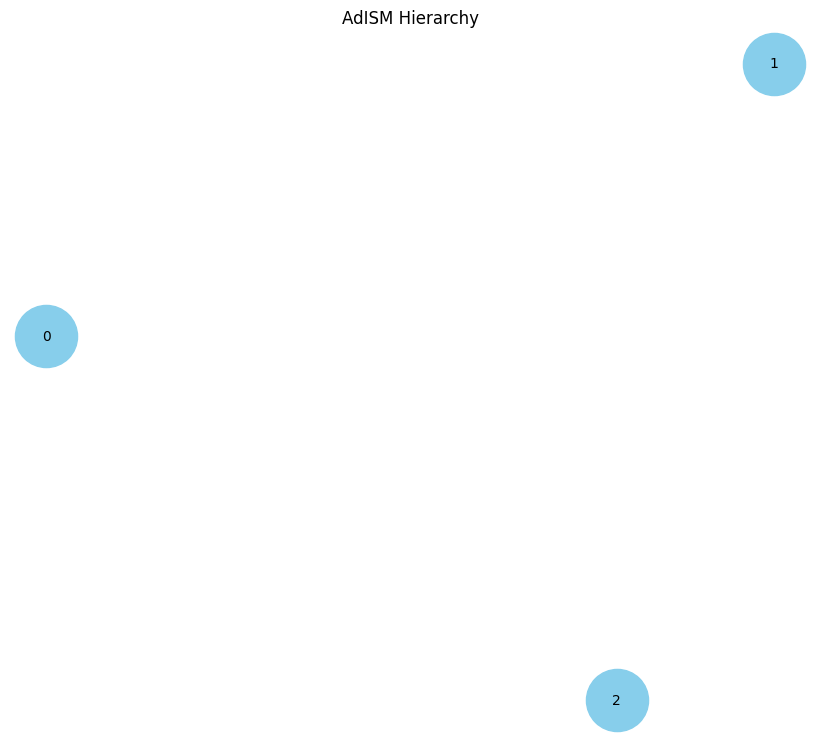

In [36]:
def visualize_hierarchy(hierarchy, title="Hierarchy"):
    G = nx.DiGraph()

    # Add nodes and edges based on hierarchy levels
    for i, level in enumerate(hierarchy):
        for node in level:
            G.add_node(node, level=i)  # Set 'level' attribute for each node
            if i + 1 < len(hierarchy):  # Ensure there is a next level
                for next_node in hierarchy[i + 1]:
                    G.add_edge(node, next_node)  # Create edges between levels

    # Get positions using a more general layout (e.g., spring_layout or shell_layout)
    pos = nx.spring_layout(G)  # Simple layout (works for most cases)

    # Draw the graph
    plt.figure(figsize=(8, 7))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, edge_color="gray")
    plt.title(title)
    plt.show()

# Visualize the hierarchy
visualize_hierarchy(hierarchy_levels, title="AdISM Hierarchy")

In [37]:
import numpy as np

# Example: Input from 3 Experts
expert1 = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
])

expert2 = np.array([
    [0, 1, 1],
    [0, 0, 1],
    [1, 0, 0]
])

expert3 = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [1, 0, 0]
])

# Stack all matrices to analyze conflicts
matrices = np.array([expert1, expert2, expert3])

In [38]:
def compute_agreement_conflict(matrices):
    """
    Compute the agreement and conflict matrices based on multiple input matrices.
    """
    n = matrices.shape[1]
    agreement_matrix = np.all(matrices == matrices[0], axis=0).astype(int) * matrices[0]  # Universal agreement
    conflict_matrix = np.any(matrices != matrices[0], axis=0).astype(int)  # Any disagreement

    return agreement_matrix, conflict_matrix

agreement_matrix, conflict_matrix = compute_agreement_conflict(matrices)

# Print Results
print("Agreement Matrix:\n", agreement_matrix)
print("Conflict Matrix:\n", conflict_matrix)

Agreement Matrix:
 [[0 0 0]
 [0 0 1]
 [1 0 0]]
Conflict Matrix:
 [[0 1 1]
 [0 0 0]
 [0 0 0]]


In [39]:
# Step 2: Analyze Conflicts
def analyze_conflicts(conflict_matrix):
    """
    Analyze conflicts and identify conflicting elements.
    """
    conflicting_elements = np.argwhere(conflict_matrix == 1)
    conflicts = [(i, j) for i, j in conflicting_elements]
    return conflicts

conflicting_elements = analyze_conflicts(conflict_matrix)
print("Conflicting Elements (row, column):", conflicting_elements)

Conflicting Elements (row, column): [(np.int64(0), np.int64(1)), (np.int64(0), np.int64(2))]


In [40]:
# Example Application: Resolve a Conflict
def resolve_conflict(expert_matrices, element):
    """
    Resolve a conflict by averaging expert inputs for the conflicting element.
    """
    i, j = element
    values = expert_matrices[:, i, j]
    resolved_value = round(np.mean(values))  # Example: Use average or majority rule
    return resolved_value

# Resolve conflicts for each conflicting element
resolved_matrix = agreement_matrix.copy()
for conflict in conflicting_elements:
    resolved_matrix[conflict] = resolve_conflict(matrices, conflict)

print("Resolved Matrix:\n", resolved_matrix)

Resolved Matrix:
 [[0 1 0]
 [0 0 1]
 [1 0 0]]


In [41]:
# Refine Agreement Matrix
def resolve_conflicts(matrices, conflict_matrix):
    """
    Refine the Agreement Matrix by resolving conflicts using majority rule.
    """
    refined_matrix = agreement_matrix.copy()
    conflicts = np.argwhere(conflict_matrix == 1)
    for i, j in conflicts:
        # Majority rule for conflict resolution
        values = matrices[:, i, j]
        resolved_value = round(np.mean(values))  # Use average (or majority rule)
        refined_matrix[i, j] = resolved_value
    return refined_matrix

refined_agreement_matrix = resolve_conflicts(matrices, conflict_matrix)

# Print Results
print("Original Agreement Matrix:\n", agreement_matrix)
print("Conflict Matrix:\n", conflict_matrix)
print("Refined Agreement Matrix:\n", refined_agreement_matrix)

Original Agreement Matrix:
 [[0 0 0]
 [0 0 1]
 [1 0 0]]
Conflict Matrix:
 [[0 1 1]
 [0 0 0]
 [0 0 0]]
Refined Agreement Matrix:
 [[0 1 0]
 [0 0 1]
 [1 0 0]]


In [42]:
def partition_hierarchy(reachability):
    levels = []
    remaining_elements = set(range(len(reachability)))
    while remaining_elements:
        current_level = []
        for i in remaining_elements:
            if all(reachability[i, j] == 0 for j in remaining_elements if i != j):
                current_level.append(i)
        levels.append(current_level)
        remaining_elements -= set(current_level)
    return levels

# Generate reachability matrix for agreement
agreement_reachability = reachability_matrix(agreement_matrix)

# Partition hierarchy
hierarchy_levels = partition_hierarchy(agreement_reachability)

print("Hierarchical Levels:\n", hierarchy_levels)

Hierarchical Levels:
 [[0, 1, 2]]


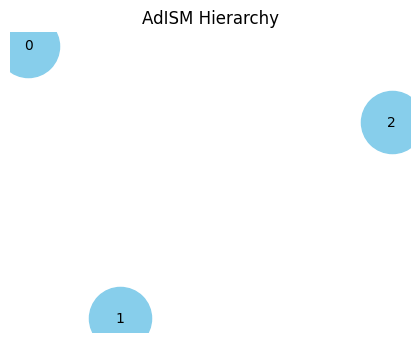

In [43]:
def visualize_hierarchy(hierarchy, title="Hierarchy"):
    G = nx.DiGraph()

    # Add nodes and edges based on hierarchy levels
    for i, level in enumerate(hierarchy):
        for node in level:
            G.add_node(node, level=i)  # Set 'level' attribute for each node
            if i + 1 < len(hierarchy):  # Ensure there is a next level
                for next_node in hierarchy[i + 1]:
                    G.add_edge(node, next_node)  # Create edges between levels

    # Get positions using a more general layout (e.g., spring_layout or shell_layout)
    pos = nx.spring_layout(G)  # Simple layout (works for most cases)

    # Draw the graph
    plt.figure(figsize=(4, 3))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, edge_color="gray")
    plt.title(title)
    plt.show()

# Visualize the hierarchy
visualize_hierarchy(hierarchy_levels, title="AdISM Hierarchy")

## Test

In [26]:
import numpy as np

def ssim_to_reachability_matrix(ssim):
    """
    Converts a Structural Self-Interaction Matrix (SSIM) to a Reachability Matrix.

    Args:
        ssim (list of list): SSIM matrix with V, A, X, O.

    Returns:
        np.ndarray: Reachability matrix.
    """
    n = len(ssim)
    reachability_matrix = np.zeros((n, n), dtype=int)

    # Convert SSIM to Initial Reachability Matrix
    for i in range(n):
        for j in range(n):
            if ssim[i][j] == 'V':
                reachability_matrix[i][j] = 1
            elif ssim[i][j] == 'A':
                reachability_matrix[j][i] = 1
            elif ssim[i][j] == 'X':
                reachability_matrix[i][j] = 1
                reachability_matrix[j][i] = 1
            elif ssim[i][j] == 'O':
                # No influence
                pass

    # Perform transitive closure
    for k in range(n):
        for i in range(n):
            for j in range(n):
                reachability_matrix[i][j] = reachability_matrix[i][j] or (
                    reachability_matrix[i][k] and reachability_matrix[k][j]
                )

    return reachability_matrix


In [32]:
import numpy as np

# Step 1: Convert SSIM to Initial Reachability Matrix
def ssim_to_initial_reachability_matrix(ssim):
    """
    Converts SSIM to the Initial Reachability Matrix based on defined rules.

    Args:
        ssim (list of list): SSIM matrix with symbols O, X, V, A.

    Returns:
        np.ndarray: Initial Reachability Matrix.
    """
    n = len(ssim)
    initial_matrix = np.zeros((n, n), dtype=int)

    for i in range(n):
        for j in range(n):
            if ssim[i][j] == 'O':  # No influence
                initial_matrix[i][j] = 0
                initial_matrix[j][i] = 0
            elif ssim[i][j] == 'X':  # Mutual influence
                initial_matrix[i][j] = 1
                initial_matrix[j][i] = 1
            elif ssim[i][j] == 'V':  # i influences j
                initial_matrix[i][j] = 1
                initial_matrix[j][i] = 0
            elif ssim[i][j] == 'A':  # j influences i
                initial_matrix[i][j] = 0
                initial_matrix[j][i] = 1

    return initial_matrix

# Step 2: Perform Transitive Closure
def transitive_closure(matrix):
    """
    Performs transitive closure on the given matrix.

    Args:
        matrix (np.ndarray): Initial Reachability Matrix.

    Returns:
        np.ndarray: Transitive Closure Matrix.
    """
    n = matrix.shape[0]
    closure_matrix = matrix.copy()

    for k in range(n):
        for i in range(n):
            for j in range(n):
                closure_matrix[i][j] = closure_matrix[i][j] or (closure_matrix[i][k] and closure_matrix[k][j])

    return closure_matrix

# Step 3: Refine Transitive Closure to Final Reachability Matrix
def refine_to_final_reachability_matrix(transitive_closure_matrix, initial_matrix):
    """
    Refines the Transitive Closure Matrix into the Final Reachability Matrix.

    Args:
        transitive_closure_matrix (np.ndarray): Transitive Closure Matrix.
        initial_matrix (np.ndarray): Initial Reachability Matrix.

    Returns:
        np.ndarray: Final Reachability Matrix.
    """
    n = initial_matrix.shape[0]
    final_matrix = transitive_closure_matrix.copy()

    for i in range(n):
        for j in range(n):
            # Include only relationships that are in the transitive closure
            # AND also in the initial matrix or derived logically.
            final_matrix[i][j] = transitive_closure_matrix[i][j]

    return final_matrix


# Example Usage
if __name__ == "__main__":
    # Example SSIM Matrix
    ssim = [
        ['O', 'V', 'X', 'A'],
        ['A', 'O', 'V', 'X'],
        ['X', 'A', 'O', 'V'],
        ['V', 'X', 'A', 'O']
    ]

    # Step 1: Convert SSIM to Initial Reachability Matrix
    initial_reachability_matrix = ssim_to_initial_reachability_matrix(ssim)
    print("Initial Reachability Matrix:")
    print(initial_reachability_matrix)

    # Step 2: Perform Transitive Closure
    transitive_closure_matrix = transitive_closure(initial_reachability_matrix)
    print("\nTransitive Closure Matrix:")
    print(transitive_closure_matrix)

    # Step 3: Refine Transitive Closure to Final Reachability Matrix
    final_reachability_matrix = refine_to_final_reachability_matrix(transitive_closure_matrix, initial_reachability_matrix)
    print("\nFinal Reachability Matrix:")
    print(final_reachability_matrix)


Initial Reachability Matrix:
[[0 1 1 0]
 [0 0 1 1]
 [1 0 0 1]
 [1 1 0 0]]

Transitive Closure Matrix:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]

Final Reachability Matrix:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [27]:
ssim = [
    ['O', 'V', 'X', 'A'],
    ['A', 'O', 'V', 'X'],
    ['X', 'A', 'O', 'V'],
    ['V', 'X', 'A', 'O']
]

# Convert SSIM to Reachability Matrix
reachability_matrix = ssim_to_reachability_matrix(ssim)

# Print the Reachability Matrix
print("Reachability Matrix:")
print(reachability_matrix)

Reachability Matrix:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [30]:
# Example SSIM Matrix
ssim = [
    ['O', 'V', 'X', 'A'],
    ['A', 'O', 'V', 'X'],
    ['X', 'A', 'O', 'V'],
    ['V', 'X', 'A', 'O']
]

# Convert SSIM to Final Reachability Matrix
final_reachability_matrix = ssim_to_reachability_matrix(ssim)

# Print the Final Reachability Matrix
print("Final Reachability Matrix:")
print(final_reachability_matrix)

Final Reachability Matrix:
[[-2305843425825530377 -2305843425825530377 -2305843425825530377
  -2305843425825530378]
 [-2305843425825530378 -2305843425825530377 -2305843425825530377
  -2305843425825530377]
 [-2305843425825530377 -2305843425825530378 -2305843425825530377
  -2305843425825530377]
 [-2305843425825530377 -2305843425825530377 -2305843425825530378
  -2305843425825530377]]
